In [1]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot as plt

In [2]:
csv_file = 'final_results.csv'

df = read_csv(csv_file)


In [3]:
plot_columns = []
for col in df.columns:
    if 'Time' not in col and 'std' not in col:
        plot_columns.append(col)


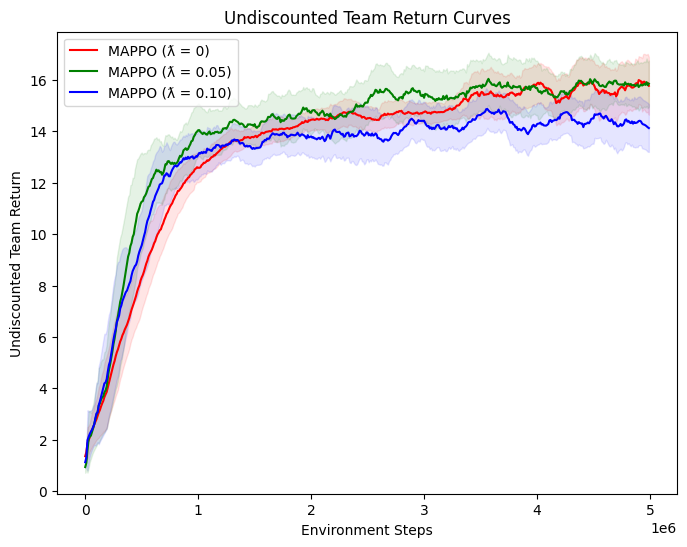

In [7]:
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'm', 'c']
for j,column in enumerate(plot_columns):
    time =  df['Timesteps'][:500]
    # Smoothing
    series = df[column][:500].rolling(window=20, min_periods=1).mean()
    series_std = df[column+' (std)'][:500]
    plt.plot(time, series, label=column, color=colors[j])
    plt.fill_between(df['Timesteps'][:500], series - series_std, series + series_std, color=colors[j], alpha=0.1)
    # plt.plot(df['Time'], df[column+' (std)'], label=column+' (std)')
    plt.legend()
plt.xlabel('Environment Steps')
plt.ylabel('Undiscounted Team Return')

plt.title('Undiscounted Team Return Curves')
plt.show()